<a href="https://colab.research.google.com/github/Claptar/play_around_find_out/blob/main/probability/functions_of_random_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(style="white")

Пусть у нас есть случайная величина $X$ с функцией распределения $F(x)$ и функцией плотности распределения $f(x)$. И мы хотим найти функцию плотности $g(y)$ случайной величины $Y = r(X)$. Нам нужно умножить исходную функцию распредления в нужной точке на параметр растяжения. Параметр растяжения -- это производная функции r(X) в точке, т.к. производная суть отношения приращения функции к приращения аргумента. Фактически это число которое говорит нам во сколько раз мы растягиваем нашу плотность распределения.

$$
g(y) = f(r^{-1}(y)) \cdot \frac{1}{r'(x)|_{x=r^{-1}(y)}}
$$

Легче всего это увидеть на примере равномерного распределения. Возьмём $X \sim U[0, 1]$. И попробуем применить различные функции.

$$
f(x) = \begin{cases} 1, & x \in [0, 1] \\
                     0, & else
       \end{cases}
$$

<Axes: ylabel='Density'>

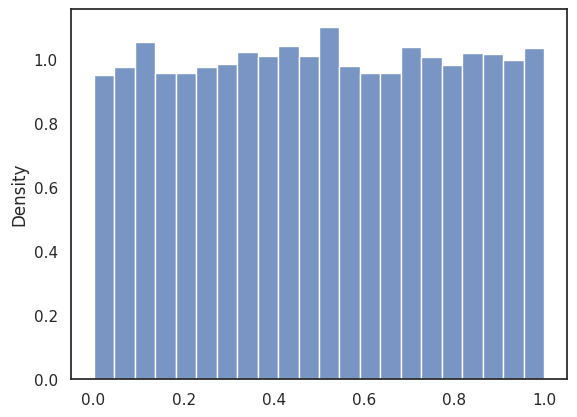

In [ ]:
x = np.linspace(0, 1, 10000)
X = np.random.default_rng().uniform(0, 1, 10000)
sns.histplot(X, stat='density')

1. Возьмём линейную функцию. Линейная функция равномерно растягивает (или сжимает плотность вероятности)
$$
Y = a * X + b
$$

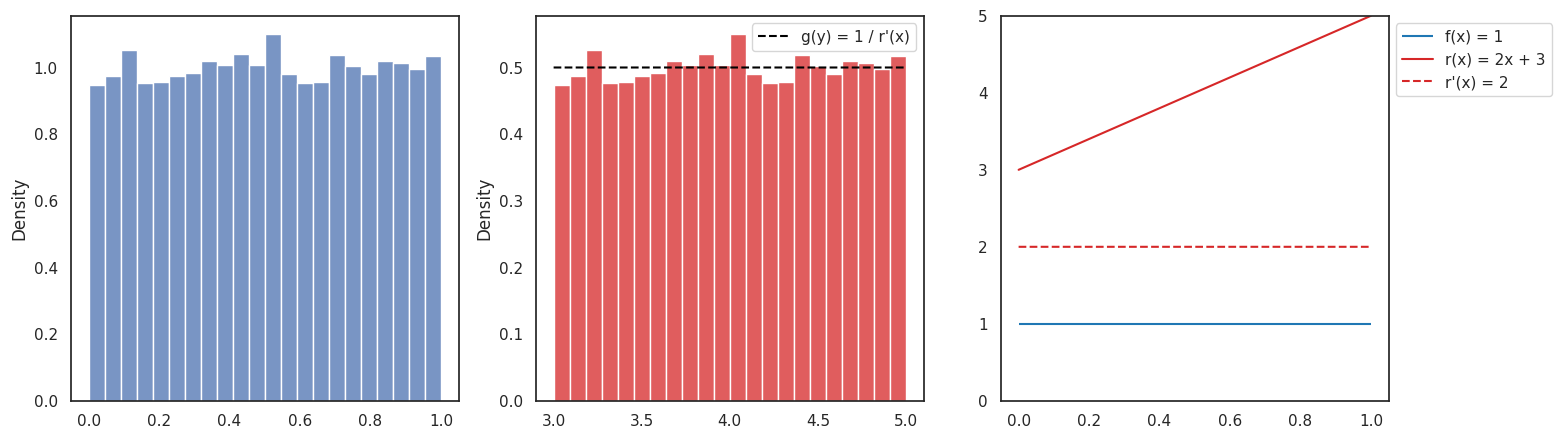

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), gridspec_kw={'wspace': 0.2})

r = lambda x: 2 * x + 3
dr = lambda x: 2 + x * 0

Y = r(X)
y = r(x)

sns.histplot(X, stat='density', ax=ax1)
sns.histplot(Y, stat='density', ax=ax2, color='tab:red')
ax2.plot(y, 1 / dr(x), linestyle='--', color='black', label="g(y) = 1 / r'(x)")
ax2.legend()
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))


ax3.hlines(1, 0, 1, color='tab:blue', label='f(x) = 1')
ax3.plot(x, r(x), linestyle='-', color='tab:red', label='r(x) = 2x + 3')
ax3.plot(x, dr(x), linestyle='--', color='tab:red', label="r'(x) = 2")

ax3.set_ylim(0, max([dr(x).max(), r(x).max()]))
ax3.legend()
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

plt.show()

2. Квадратичную функцию. Квадратичная функция до 1 имеет производную меньше 1, т.е. будет сжимать (увеличивать) плотность вероятности, а после 1 будет соответсвенно растягивать (уменьшать).
$$
Y = X ^ 2
$$

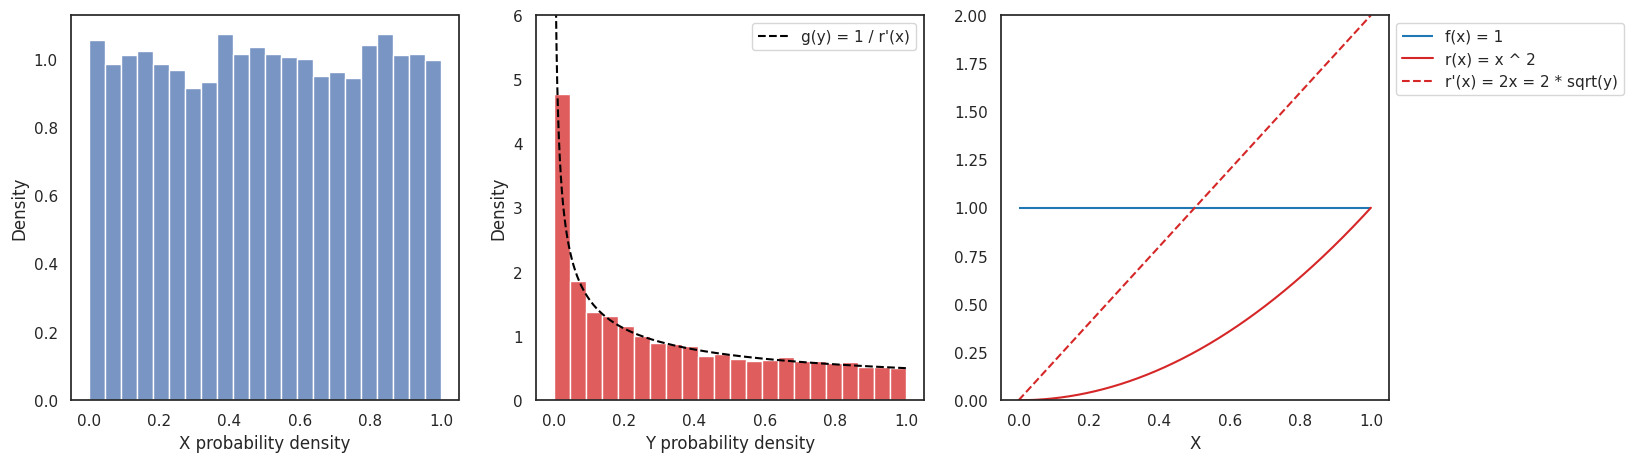

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), gridspec_kw={'wspace': 0.2})

r = lambda x: x ** 2
dr = lambda x: 2 * x

Y = r(X)
y = r(x)

sns.histplot(X, stat='density', ax=ax1)
ax1.set_xlabel('X probability density')

sns.histplot(Y, stat='density', ax=ax2, color='tab:red')
ax2.plot(y, 1 / (dr(x) + 1e-6), linestyle='--', color='black', label="g(y) = 1 / r'(x)")
ax2.set_xlabel('Y probability density')
ax2.legend()
ax2.set_ylim(0, 6)
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))


ax3.hlines(1, 0, 1, color='tab:blue', label='f(x) = 1')
ax3.plot(x, r(x), linestyle='-', color='tab:red', label='r(x) = x ^ 2')
ax3.plot(x, dr(x), linestyle='--', color='tab:red', label="r'(x) = 2x = 2 * sqrt(y)")

ax3.set_ylim(0, max([dr(x).max(), r(x).max()]))
ax3.set_xlabel('X')
ax3.legend()
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

plt.show()

3. Коренная функция. Квадратичная функция до 1 имеет производную больше 1 и соответсвенно будет растягивать (уменьшать плотность) тем сильнее чем ближе к 0.
$$
Y = \sqrt X
$$

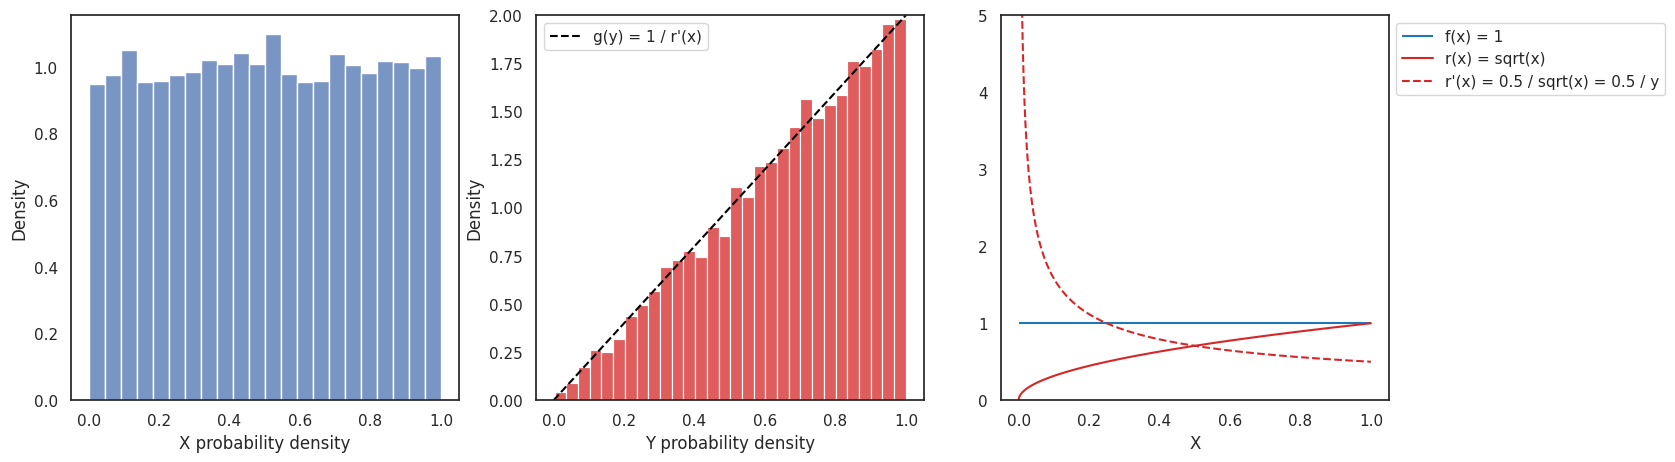

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), gridspec_kw={'wspace': 0.2})

r = lambda x: np.sqrt(x)
dr = lambda x: 0.5 / (np.sqrt(x) + 1e-6)

Y = r(X)
y = r(x)

sns.histplot(X, stat='density', ax=ax1)
ax1.set_xlabel('X probability density')

sns.histplot(Y, stat='density', ax=ax2, color='tab:red')
ax2.plot(y, 1 / dr(x), linestyle='--', color='black', label="g(y) = 1 / r'(x)")
ax2.set_xlabel('Y probability density')
ax2.legend()
ax2.set_ylim(0, 2)
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))


ax3.hlines(1, 0, 1, color='tab:blue', label='f(x) = 1')
ax3.plot(x, r(x), linestyle='-', color='tab:red', label='r(x) = sqrt(x)')
ax3.plot(x, dr(x), linestyle='--', color='tab:red', label="r'(x) = 0.5 / sqrt(x) = 0.5 / y")
ax3.set_xlabel('X')
ax3.set_ylim(0, 5)
ax3.legend()
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

plt.show()

По такому принципу из любого распределения $Z$ c функцией распределения $G(z)$ можно получить равномерное $X \sim U[0, 1]$, если в качестве $r(Z)$ взять функцию распределения $G$ этой случайной величины т.к производной функции распределения является функция плотности распределения.

$$
X = G(Z) \sim U[0, 1]
$$

Проверим это на примере $Z \sim Exp(\lambda)$. Функции распределения и плотности распределения:

$$
G(z) = 1 - \exp(-\lambda x),
\\
g(z) = \lambda \exp(-\lambda x)
$$

<Axes: ylabel='Density'>

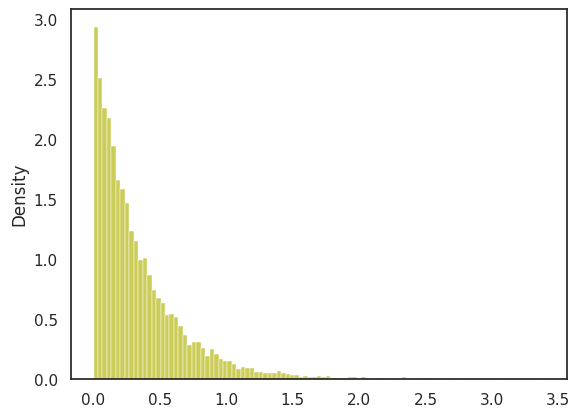

In [ ]:
lamb = 3
Z = np.random.default_rng().exponential(scale= 1 / lamb, size=10000)
z = np.linspace(0, Z.max(), 1000)
sns.histplot(Z, stat='density', color='tab:olive')

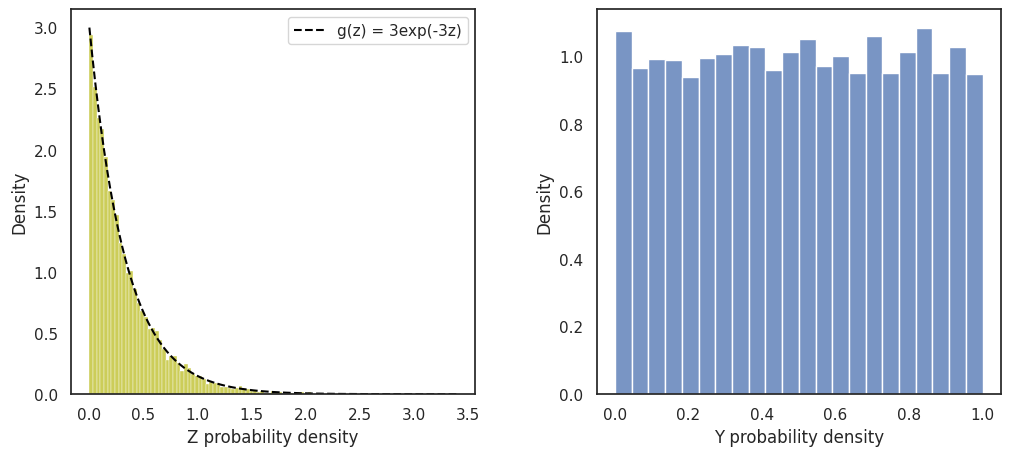

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.3})

G = lambda z: 1 - np.exp(-lamb * z)
g = lambda z: lamb * np.exp(-lamb * z)

X = G(Z)


sns.histplot(Z, stat='density', ax=ax1, color='tab:olive')
ax1.plot(z, g(z), linestyle='--', color='black', label=f"g(z) = {lamb}exp(-{lamb}z)")
ax1.set_xlabel('Z probability density')
ax1.legend()

sns.histplot(X, stat='density', ax=ax2)
ax2.set_xlabel('Y probability density')

plt.show()

Аналогично из равномерного распределения можно получить любое другое, если знать обратную функцию распределения. Попробуем получить экспоненциальное распределение из равномерного. Для этого возьмём $X \sim U[0, 1]$ и $Y = F(X)$, где
$$
F(x) = - \frac{\ln(1 - x)}{\lambda}
$$

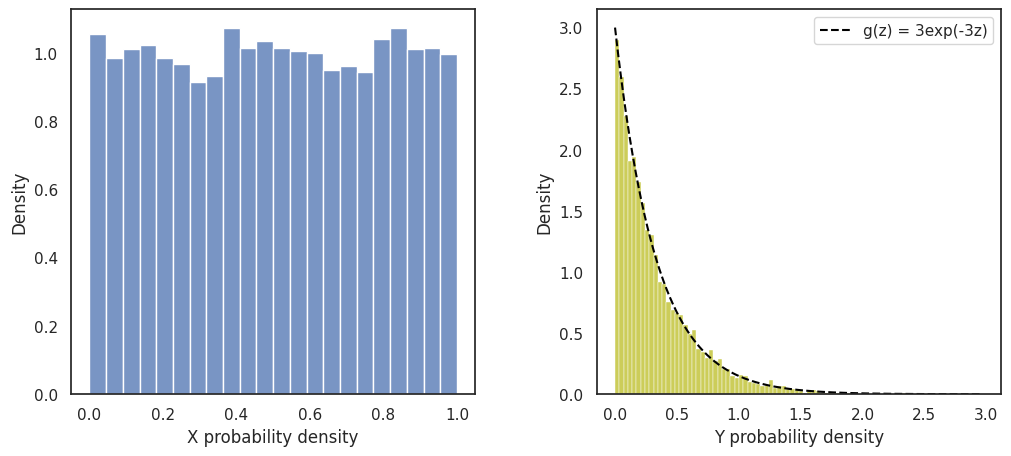

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.3})

x = np.linspace(0, 1, 10000)
X = np.random.default_rng().uniform(0, 1, 10000)

lamb = 3
Y = - np.log(1 - X) / lamb
y = np.linspace(0, Y.max(), 1000)
g = lambda y: lamb * np.exp(-lamb * y)

sns.histplot(X, stat='density', ax=ax1)
ax1.set_xlabel('X probability density')

sns.histplot(Y, stat='density', ax=ax2, color='tab:olive')
ax2.plot(y, g(y), linestyle='--', color='black', label=f"g(z) = {lamb}exp(-{lamb}z)")
ax2.set_xlabel('Y probability density')
ax2.legend()
